C:\Users\aryan\AppData\Local\Temp\ipykernel_20940\3262017246.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
C:\Users\aryan\AppData\Local\Temp\ipykernel_20940\3262017246.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)


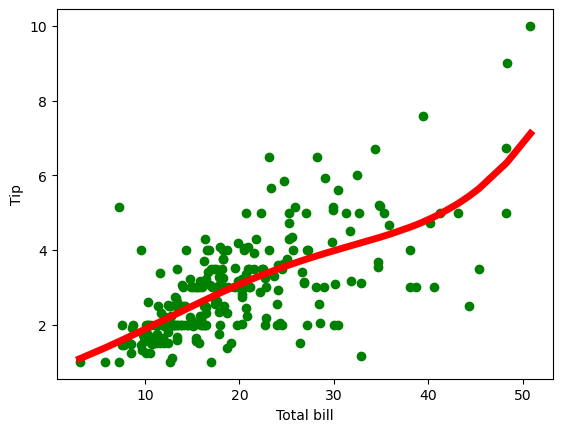

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Kernel function to calculate weights [cite: 21]
def kernel(point, xmat, k):
    m, n = np.shape(xmat) 
    weights = np.mat(np.eye(m)) # eye - identity matrix [cite: 23]
    for j in range(m):
        diff = point - xmat[j] # Calculated difference [cite: 25]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    return weights 

# Function to calculate local weights [cite: 28]
def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k) 
    # Calculate W using the formula: (X.T * W * X)^-1 * X.T * W * Y.T
    W = (xmat.T * (wei * xmat)).I * (xmat.T * (wei * ymat.T))
    return W

# Main Regression Function [cite: 31]
def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m) 
    for i in range(m): 
      ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
    return ypred 

# Function to plot the graph [cite: 37]
def graphPlot(X, ypred):
    sortindex = X[:, 1].argsort(0) # argsort - index of the smallest [cite: 38]
    xsort = X[sortindex][:, 0]
    fig = plt.figure() 
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(bill, tip, color='green') 
    ax.plot(xsort[:, 1], ypred[sortindex], color='red', linewidth=5) 
    plt.xlabel('Total bill') 
    plt.ylabel('Tip') 
    plt.show()

# --- Main Execution ---

# load data points [cite: 46]
# Note: This requires a file named '10data_tips.csv' in the same directory
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data [cite: 48]
tip = np.array(data.tip) 

mbill = np.mat(bill) # .mat converts nd array to 2D array [cite: 50]
mtip = np.mat(tip)
m = np.shape(mbill)
one = np.mat(np.ones(m))

# Stack ones and bill data to create X matrix
X = np.hstack((one.T, mbill.T)) # 244 rows, 2 cols [cite: 53]

# Perform regression
# Increase k to get smoother curves
ypred = localWeightRegression(X, mtip, 8) 

# Plot results
graphPlot(X, ypred) 